In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
data = pd.read_csv('ToyotaCorolla.csv')
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [3]:
data.shape

(1436, 37)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Automatic         1436 non-null   int64 
 11  cc                1436 non-null   int64 
 12  Doors             1436 non-null   int64 
 13  Cylinders         1436 non-null   int64 
 14  Gears             1436 non-null   int64 
 15  Quarterly_Tax     1436 non-null   int64 
 16  Weight            1436 non-null   int64 
 17  Mfr_Guarantee 

In [5]:
corolla = data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
corolla.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [6]:
corolla.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


## Scatterplot between the variables with their histograms

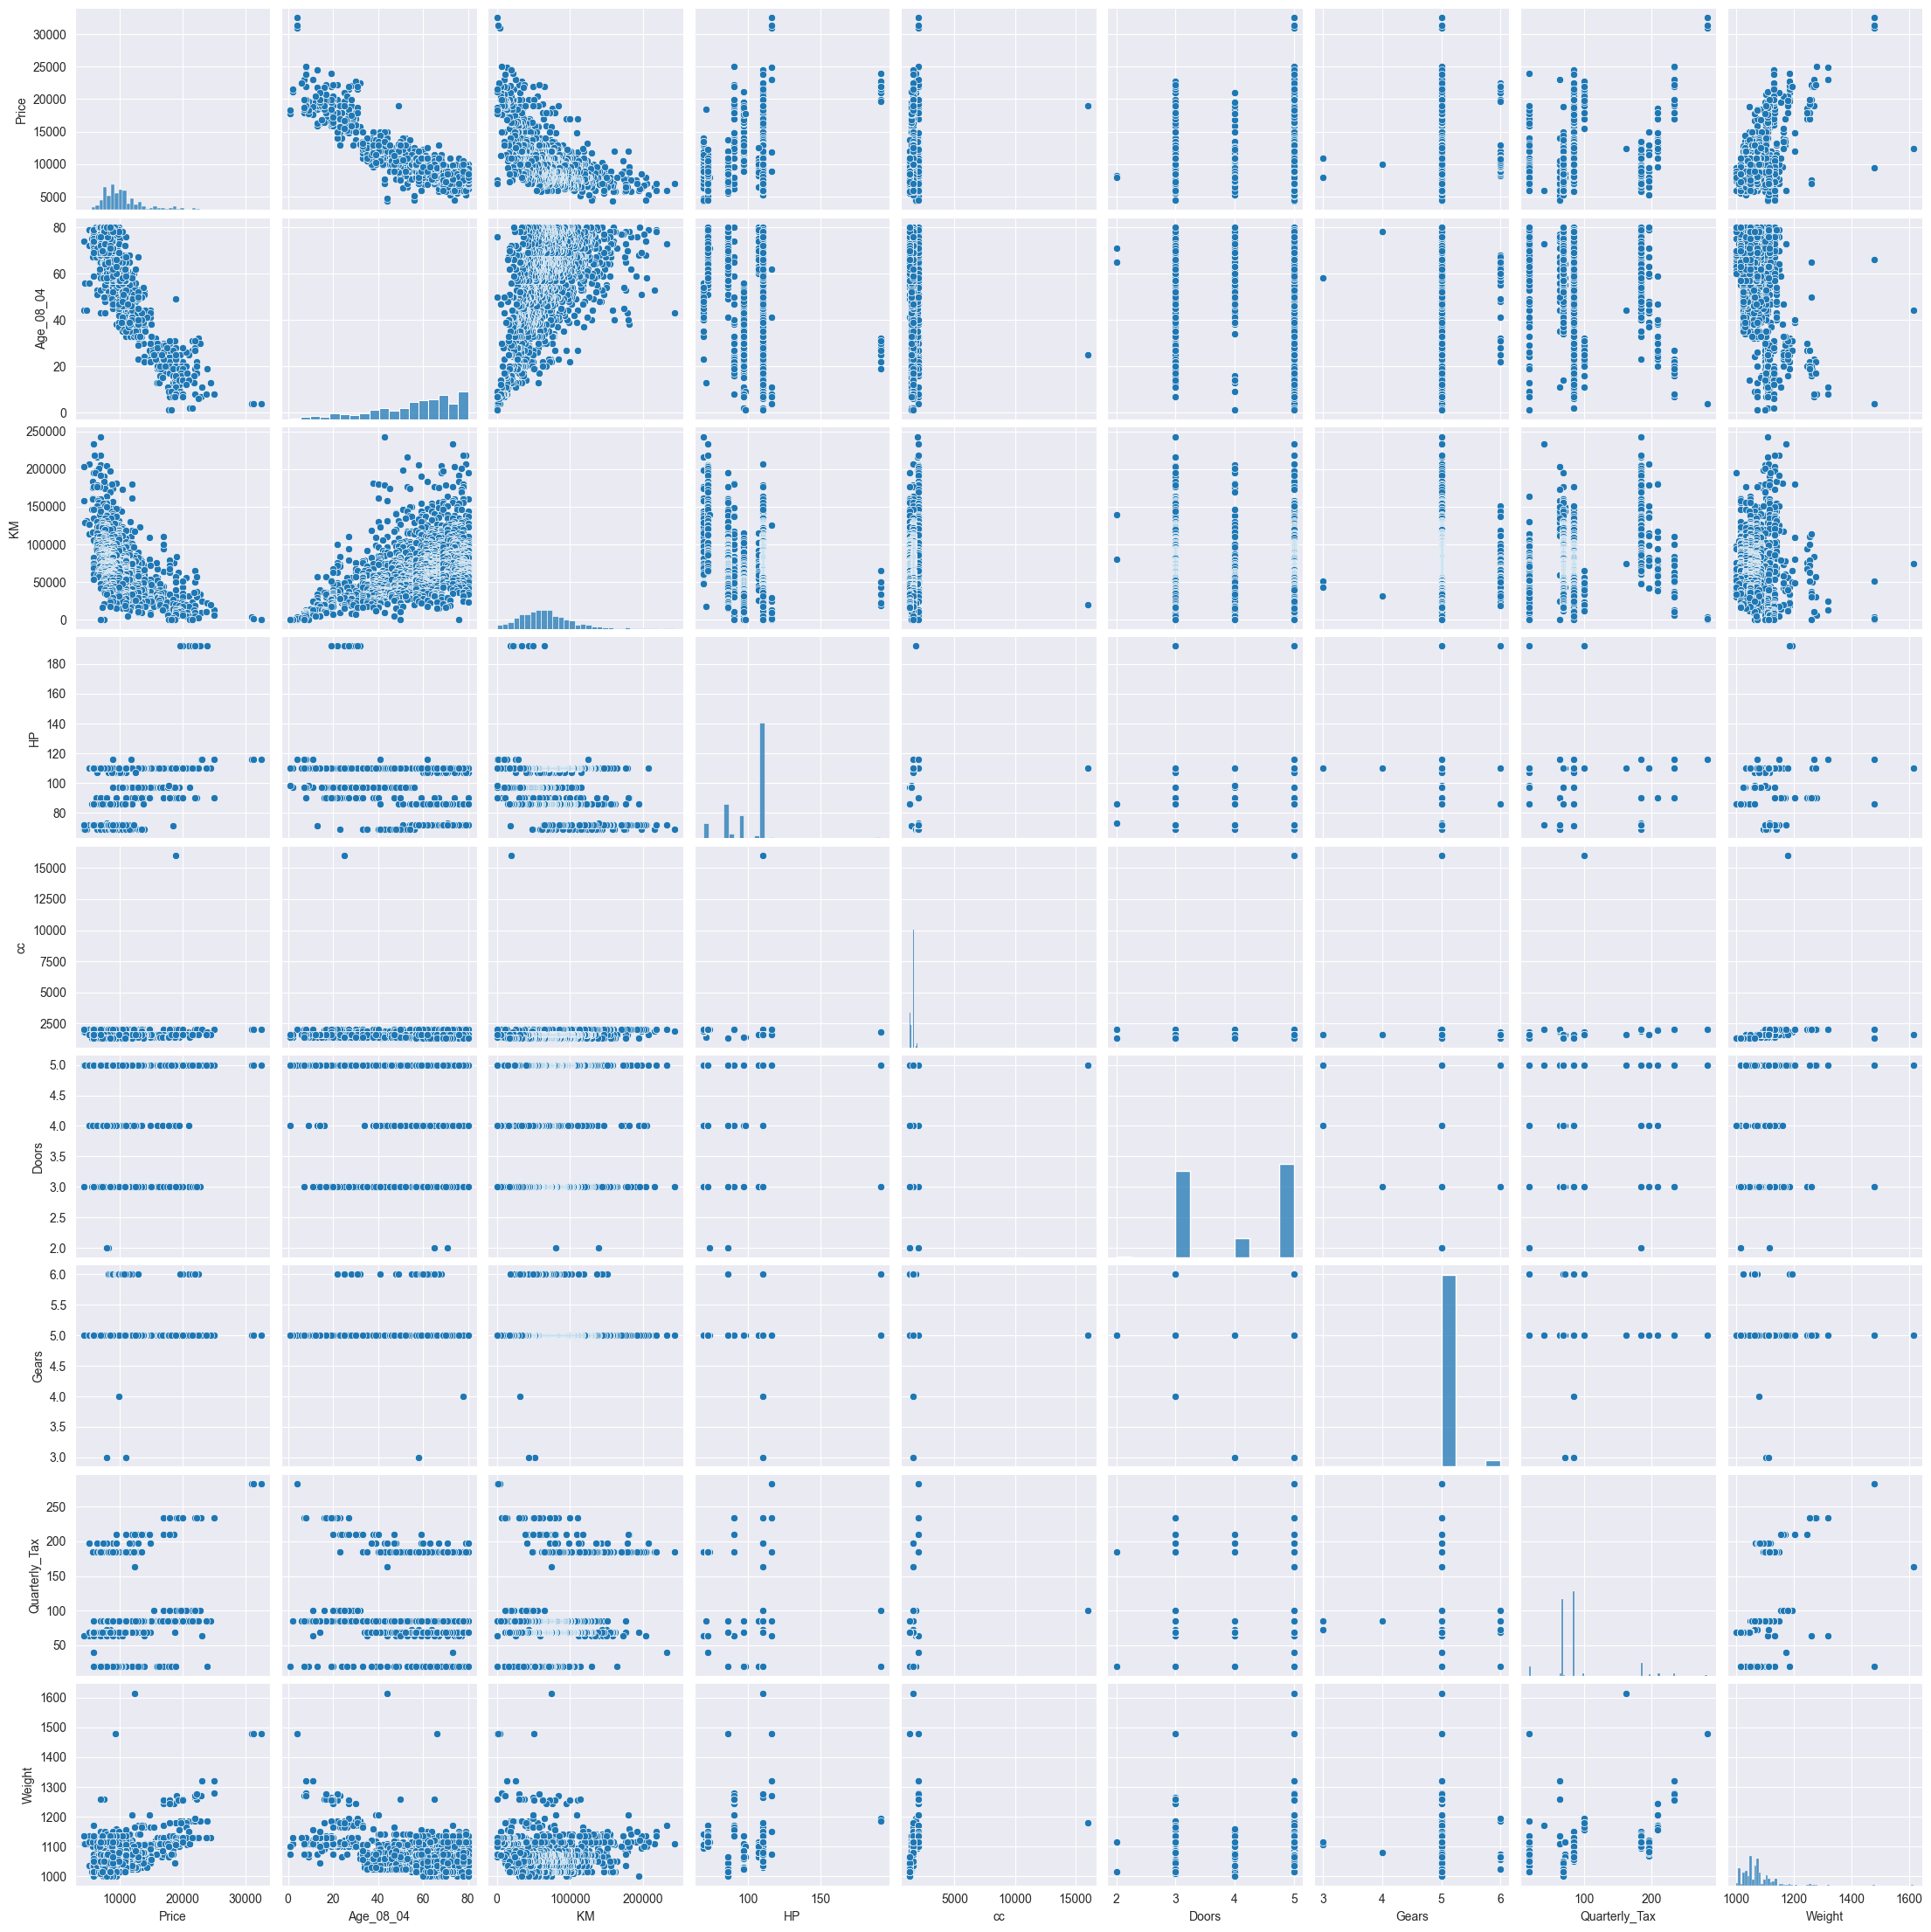

In [7]:
#Format the plot background and scatter plots for all the variables
sn.set_style(style='darkgrid')
sn.pairplot(corolla)

The variable cc and Gears have very less correlation with the Price variable. So these two can be neglected.

Also, the pairs of variables KM and Age_08_04, and Weight and Quarterly_Tax has somewhat high correlation between each other which could lead to some multi-collinearity issues. So the VIF should be calculated to decide which variable to keep in each of these pairs.

Also the Doors variable has a higher correlation with Weight than what it has with Price. We can ignore this variable as it has less correlation with Price or we can check the VIF for this as well.

## Preparing a model

In [8]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Price~Age_08_04+KM+HP+Doors+Quarterly_Tax+Weight',data=corolla).fit()

In [9]:
#Coefficients
model.params

Intercept       -2632.401532
Age_08_04        -121.836702
KM                 -0.020656
HP                 33.382573
Doors             -23.799807
Quarterly_Tax       3.902807
Weight             16.749202
dtype: float64

In [10]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept        -2.491879
Age_08_04       -46.443734
KM              -16.529013
HP               12.217971
Doors            -0.604092
Quarterly_Tax     2.994691
Weight           15.836603
dtype: float64 
 Intercept         1.281955e-02
Age_08_04        8.594872e-288
KM                2.703886e-56
HP                1.004238e-32
Doors             5.458781e-01
Quarterly_Tax     2.794480e-03
Weight            3.630444e-52
dtype: float64


In [11]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.862710054870824, 0.8621336100347322)

## Simple Linear Regression Models

The p value of Doors variable is more than 0.05. So we need to check if is because of the variable itself or any other factor. We can check for the p values of each variable individually and confirm this.

### For variable Doors

In [12]:
ml_d=smf.ols('Price~Doors',data = corolla).fit()  
#t and p-Values
print(ml_d.tvalues, '\n', ml_d.pvalues)

Intercept    19.258097
Doors         7.141657
dtype: float64 
 Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64


The p value is less than 0.05. So, something else causing this to get a high p value in the initial model

## Calculating the VIFs

In [13]:
rsq_Age = smf.ols('Age_08_04~KM+HP+Doors+Quarterly_Tax+Weight',data=corolla).fit().rsquared  
vif_Age = 1/(1-rsq_Age)

rsq_KM = smf.ols('KM~Age_08_04+HP+Doors+Quarterly_Tax+Weight',data=corolla).fit().rsquared  
vif_KM = 1/(1-rsq_KM)

rsq_HP = smf.ols('HP~Age_08_04+KM+Doors+Quarterly_Tax+Weight',data=corolla).fit().rsquared  
vif_HP = 1/(1-rsq_HP)

rsq_D = smf.ols('Doors~Age_08_04+KM+HP+Quarterly_Tax+Weight',data=corolla).fit().rsquared  
vif_D = 1/(1-rsq_D)

rsq_Q = smf.ols('Quarterly_Tax~Age_08_04+KM+HP+Doors+Weight',data=corolla).fit().rsquared  
vif_Q = 1/(1-rsq_Q)

rsq_W = smf.ols('Weight~Age_08_04+KM+HP+Doors+Quarterly_Tax',data=corolla).fit().rsquared  
vif_W = 1/(1-rsq_W)

d1 = {'Variables':['Age_08_04','KM','HP','Doors','Quarterly_Tax','Weight'],'VIF':[vif_Age,vif_KM,vif_HP,vif_D,vif_Q,vif_W]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Age_08_04,1.883798
1,KM,1.738309
2,HP,1.325667
3,Doors,1.114649
4,Quarterly_Tax,2.273240
5,Weight,2.452569


The variable Weight has the highest VIF among the Weight and Doors pair which means it should be removed but considering that it has very high correlation with Price compared to that of Doors. So, Doors can be removed instead of weight.

And between the variable Weight and Quarterly_Tax, Weight has higher VIF but both have some meaningful correlation with price.

Finally we can continue with Age_08_04, KM, HP, Quarterly_Tax, Weight for the training process.

In [14]:
model_new = smf.ols('Price~Age_08_04+KM+HP+Quarterly_Tax+Weight',data=corolla).fit()

In [15]:
model_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1797.
Date:                Mon, 26 Jun 2023   Prob (F-statistic):               0.00
Time:                        14:35:18   Log-Likelihood:                -12381.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1430   BIC:                         2.481e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2554.4355   1048.246     -2.437      0.015   -4610.700    -498.171
Age_08_04      -121.8366      2.623    -46.454      0.000    -126.981    -116.692
KM               -0.0207      0.001    -16.543      0.000      -0.023      -0.018
HP               33.3411      2.731     12.209      0.000      27.984      38.698
Quarterly_Tax     3.9716      1.298      3.060      0.002       1.425       6.518
Weight           16.5860      1.022     16.224      0.000      14.581      18.591
==============================================================================
Omnibus:                      144.527   Durbin-Watson:                   1.545
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              910.235
Skew:                          -0.209   Prob(JB):                    2.21e-198
Kurtosis:                       6.878   Cond. No.                     2.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1497.
Date:                Mon, 26 Jun 2023   Prob (F-statistic):               0.00
Time:                        14:35:18   Log-Likelihood:                -12381.
No. Observations:                1436   AIC:                         2.478e+04
Df Residuals:                    1429   BIC:                         2.481e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2632.4015   1056.392     -2.492      0.013   -4704.647    -560.156
Age_08_04      -121.8367      2.623    -46.444      0.000    -126.983    -116.691
KM               -0.0207      0.001    -16.529      0.000      -0.023      -0.018
HP               33.3826      2.732     12.218      0.000      28.023      38.742
Doors           -23.7998     39.398     -0.604      0.546    -101.083      53.484
Quarterly_Tax     3.9028      1.303      2.995      0.003       1.346       6.459
Weight           16.7492      1.058     15.837      0.000      14.675      18.824
==============================================================================
Omnibus:                      147.853   Durbin-Watson:                   1.548
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              946.730
Skew:                          -0.220   Prob(JB):                    2.63e-206
Kurtosis:                       6.953   Cond. No.                     2.32e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

---------------------------
Not much change in the r-squared and the adjusted r-squared values even the Doors variable is removed. And we are getting a pretty decent score in both the models.

## Residual Analysis

### Test for Normality of Residuals (Q-Q Plot)

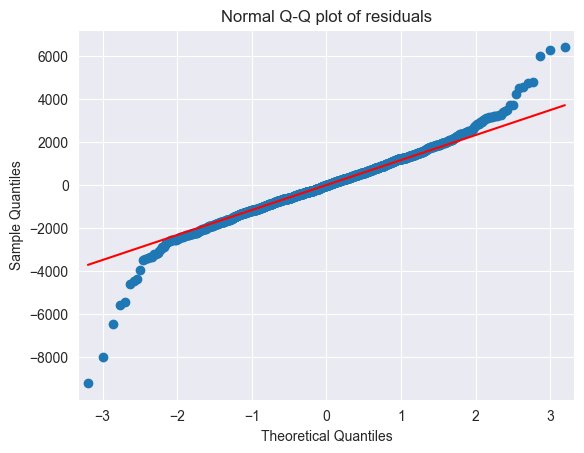

In [17]:
import statsmodels.api as sm
qqplot=sm.qqplot(model_new.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [18]:
list(np.where(model_new.resid>10))

[array([   6,    7,    8,   10,   13,   14,   15,   16,   17,   18,   19,
          20,   21,   22,   23,   24,   26,   27,   28,   29,   32,   35,
          36,   38,   41,   43,   45,   46,   47,   49,   51,   52,   53,
          56,   58,   59,   61,   62,   63,   64,   65,   66,   68,   69,
          70,   72,   74,   75,   76,   77,   78,   80,   81,   83,   84,
          85,   88,   89,   90,   91,   92,   94,   95,   98,   99,  100,
         102,  103,  104,  105,  106,  107,  108,  109,  110,  111,  112,
         113,  114,  115,  116,  118,  119,  120,  121,  123,  125,  126,
         127,  128,  134,  136,  138,  139,  141,  142,  143,  144,  146,
         147,  148,  149,  150,  151,  152,  153,  154,  156,  157,  158,
         159,  160,  161,  162,  163,  165,  166,  167,  168,  169,  170,
         171,  172,  173,  174,  175,  176,  177,  178,  179,  180,  181,
         182,  183,  190,  194,  196,  197,  201,  204,  210,  211,  216,
         223,  230,  232,  233,  237, 

### Residual Plot for Homoscedasticity

In [19]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

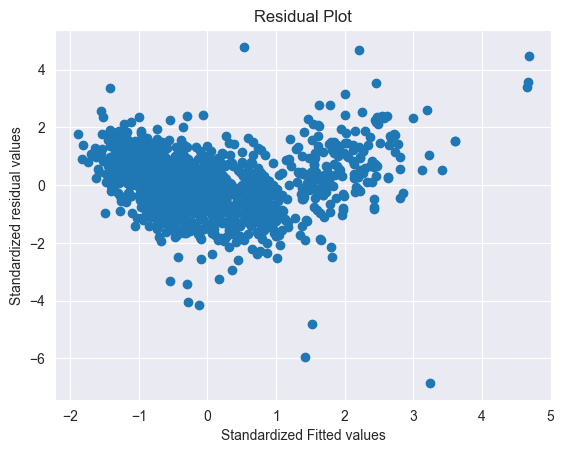

In [20]:
plt.scatter(get_standardized_values(model_new.fittedvalues),
            get_standardized_values(model_new.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

Points are equally distributed around the 0 which means that the average is 0. So, the model_new works fine.

### Residual Vs Regressors

eval_env: 1


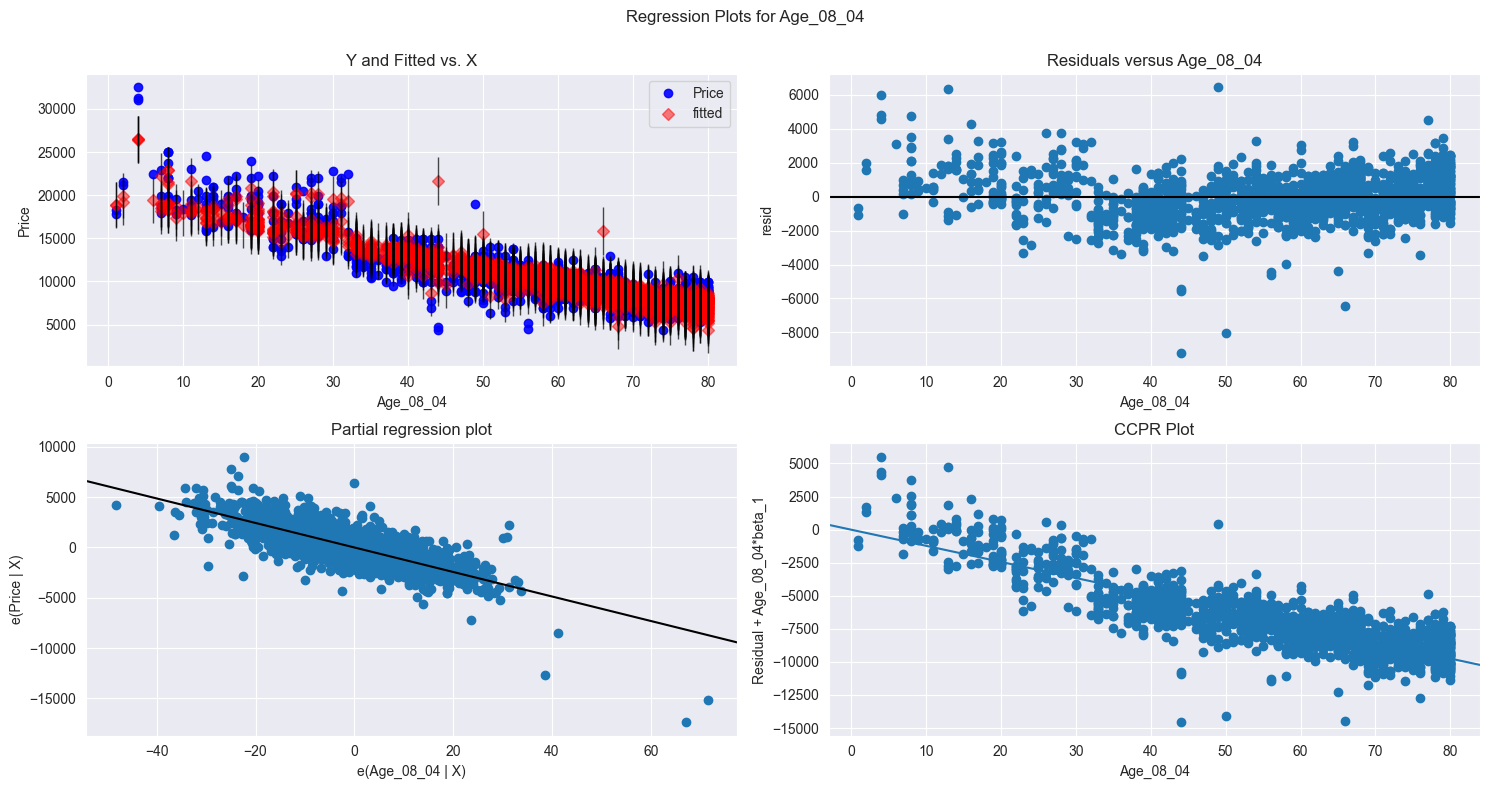

In [21]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_new, "Age_08_04", fig=fig)
plt.show()

eval_env: 1


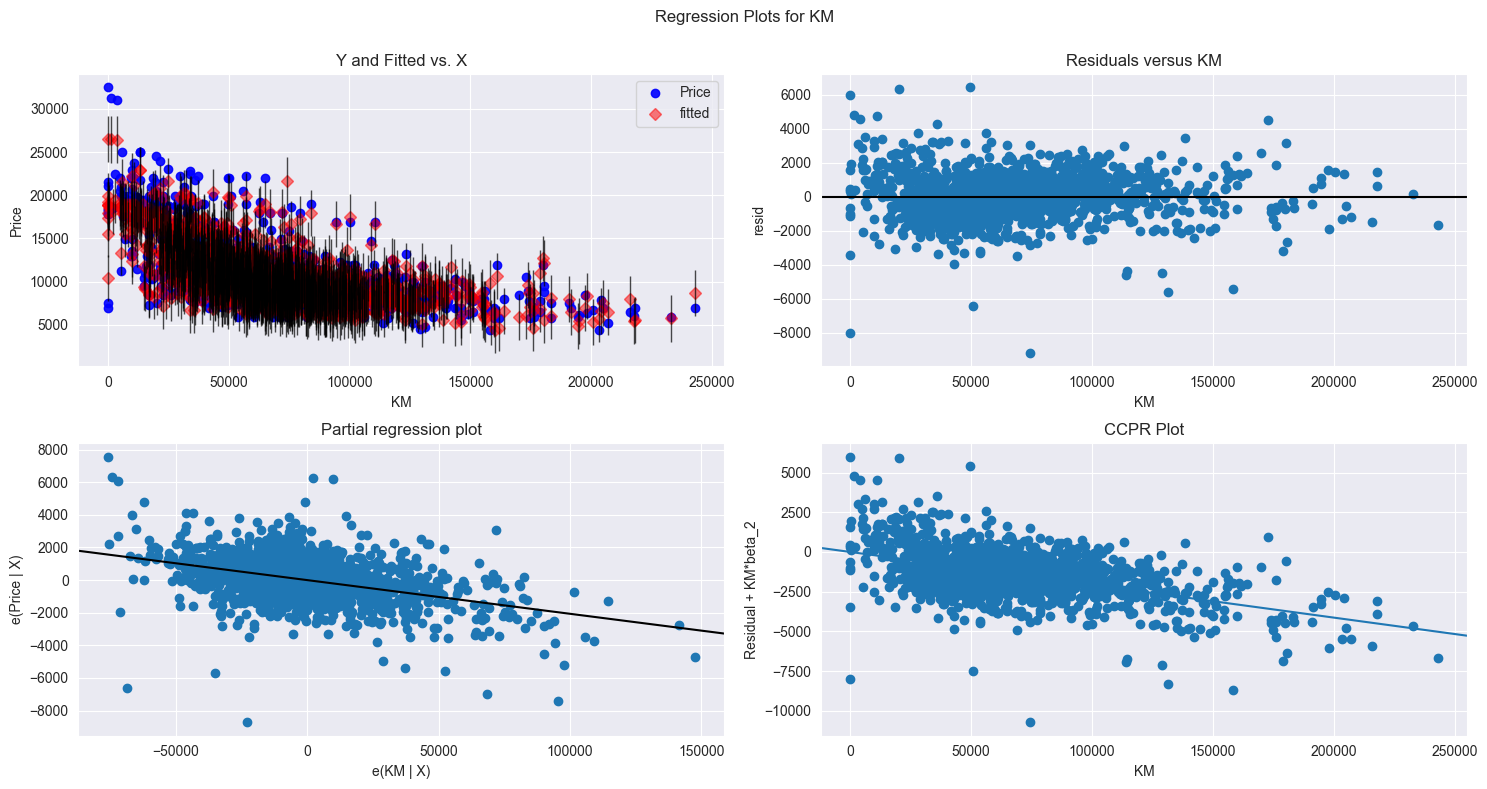

In [22]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_new, "KM", fig=fig)
plt.show()

eval_env: 1


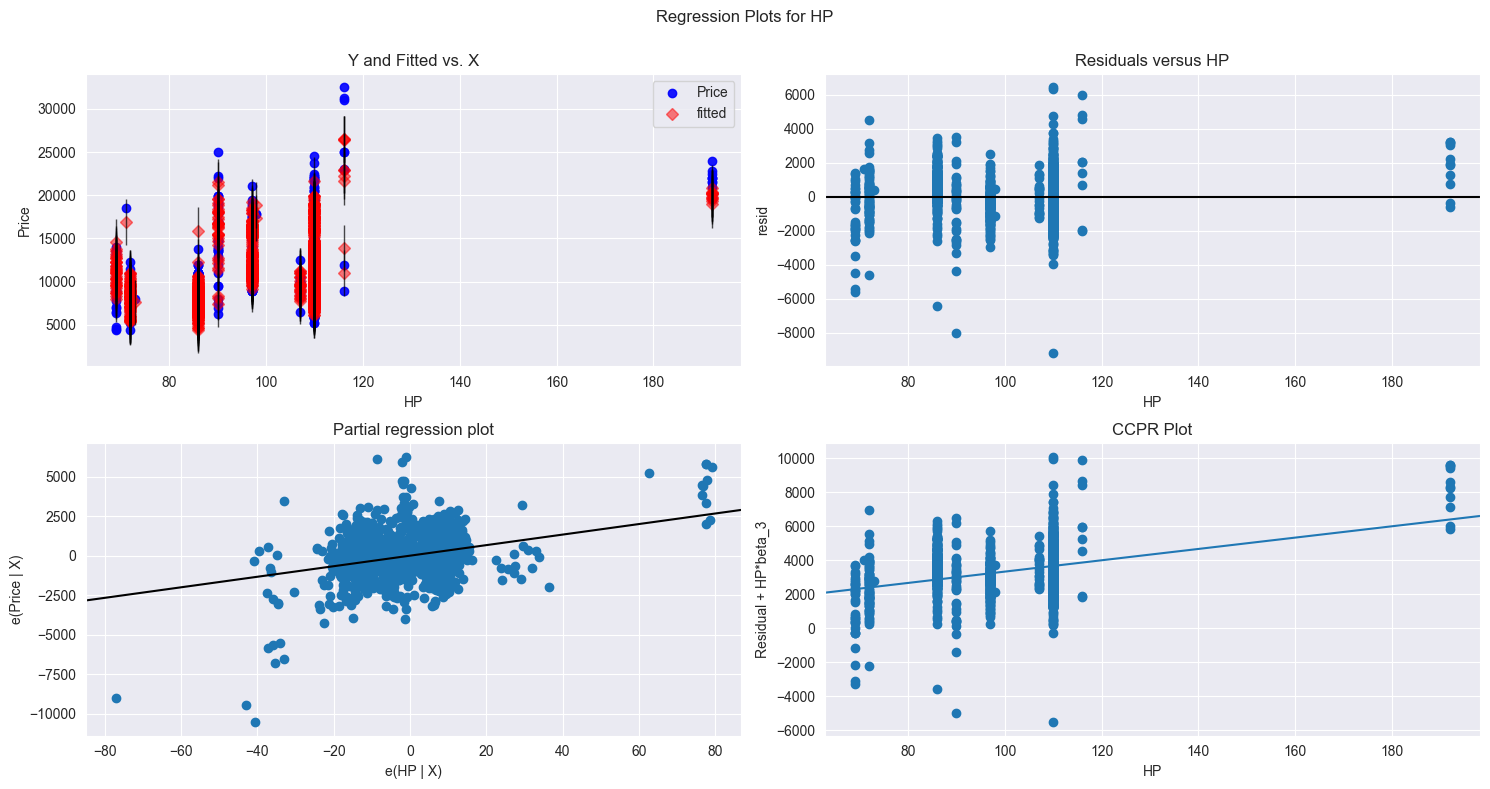

In [23]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_new, "HP", fig=fig)
plt.show()

eval_env: 1


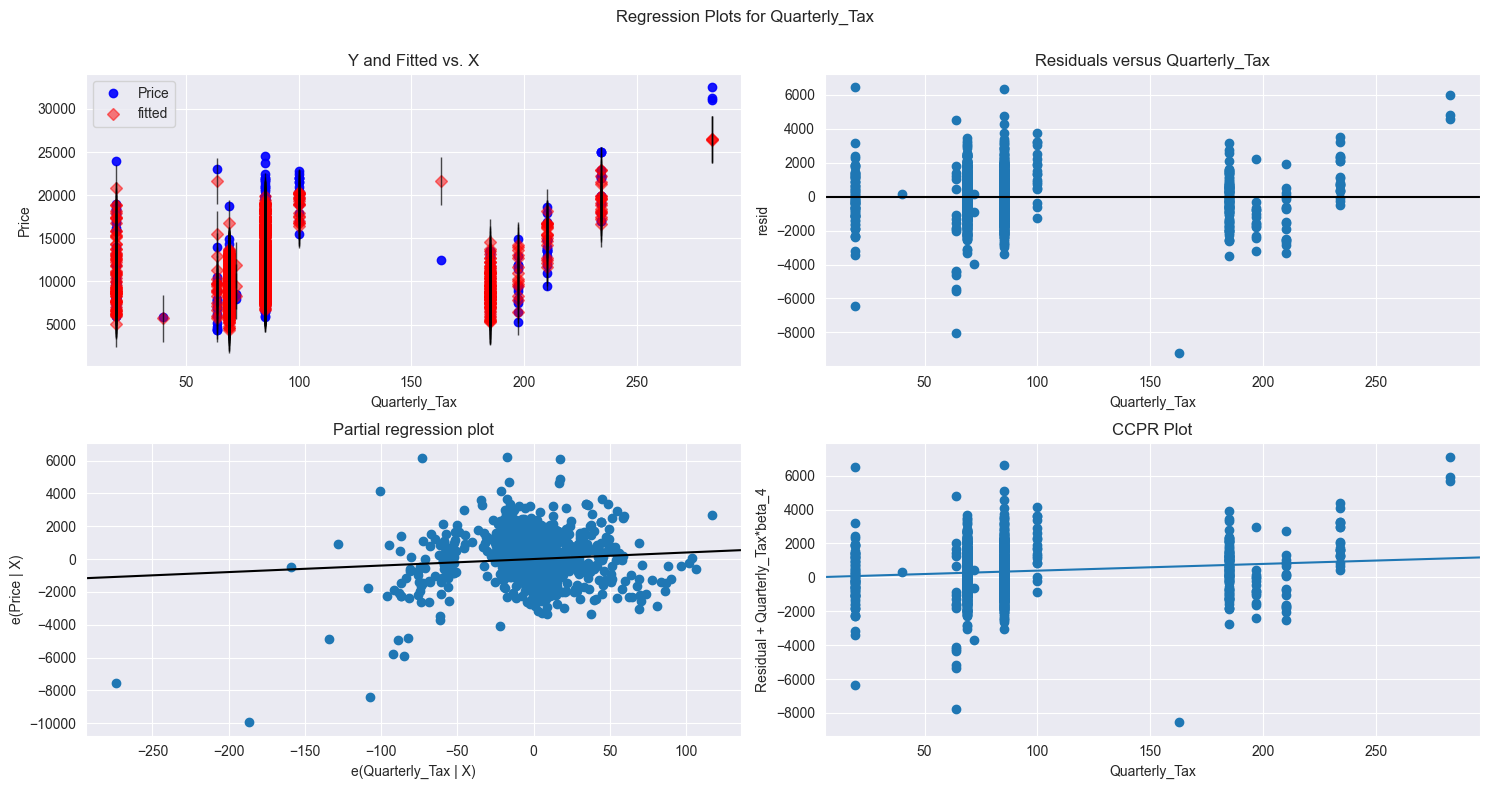

In [24]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_new, "Quarterly_Tax", fig=fig)
plt.show()

eval_env: 1


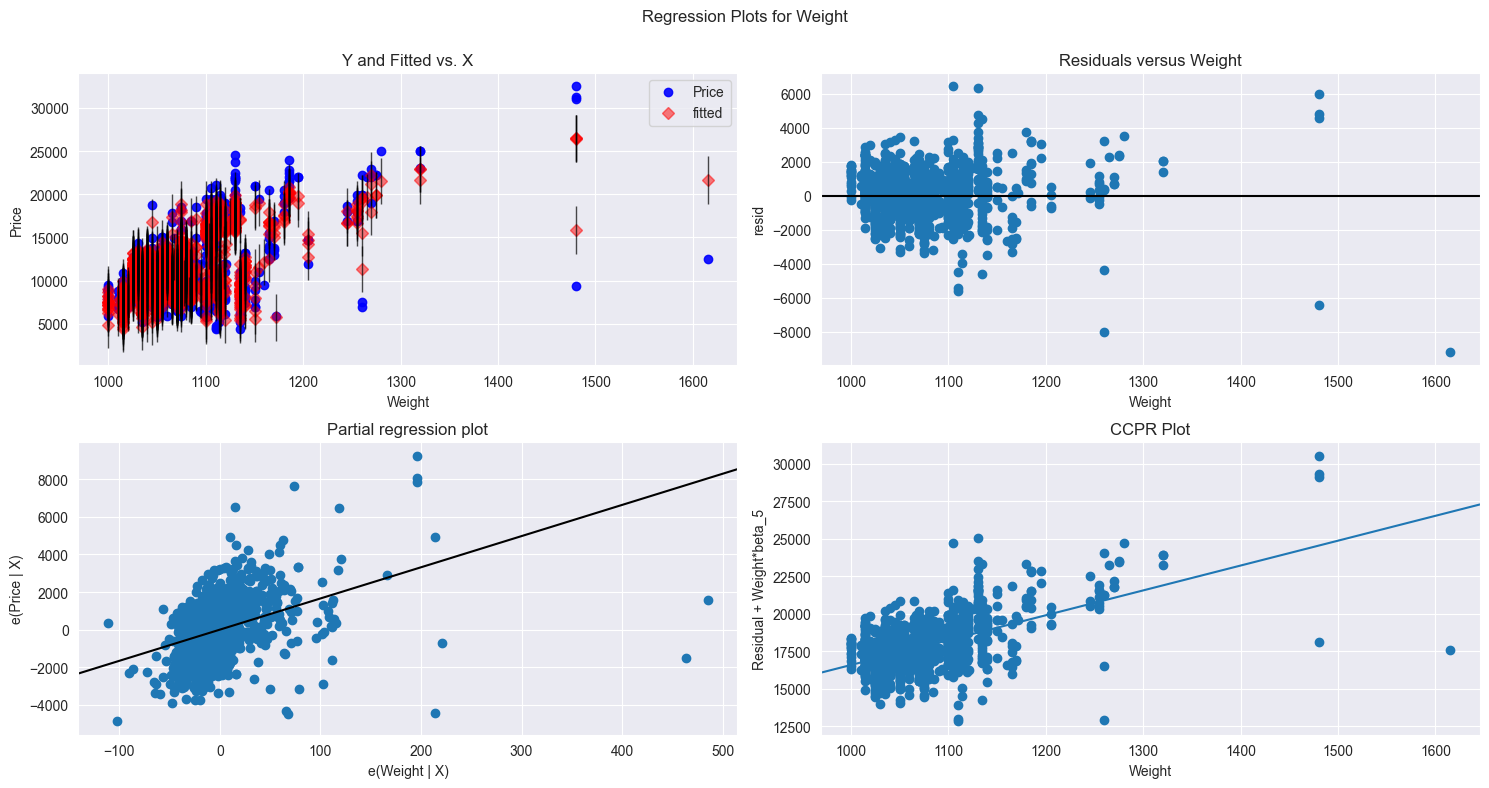

In [25]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_new, "Weight", fig=fig)
plt.show()

## Model Deletion Diagnostics

### Detecting Influencers or Outliers

### Cook’s Distance

In [26]:
model_influence = model_new.get_influence()
(c, _) = model_influence.cooks_distance

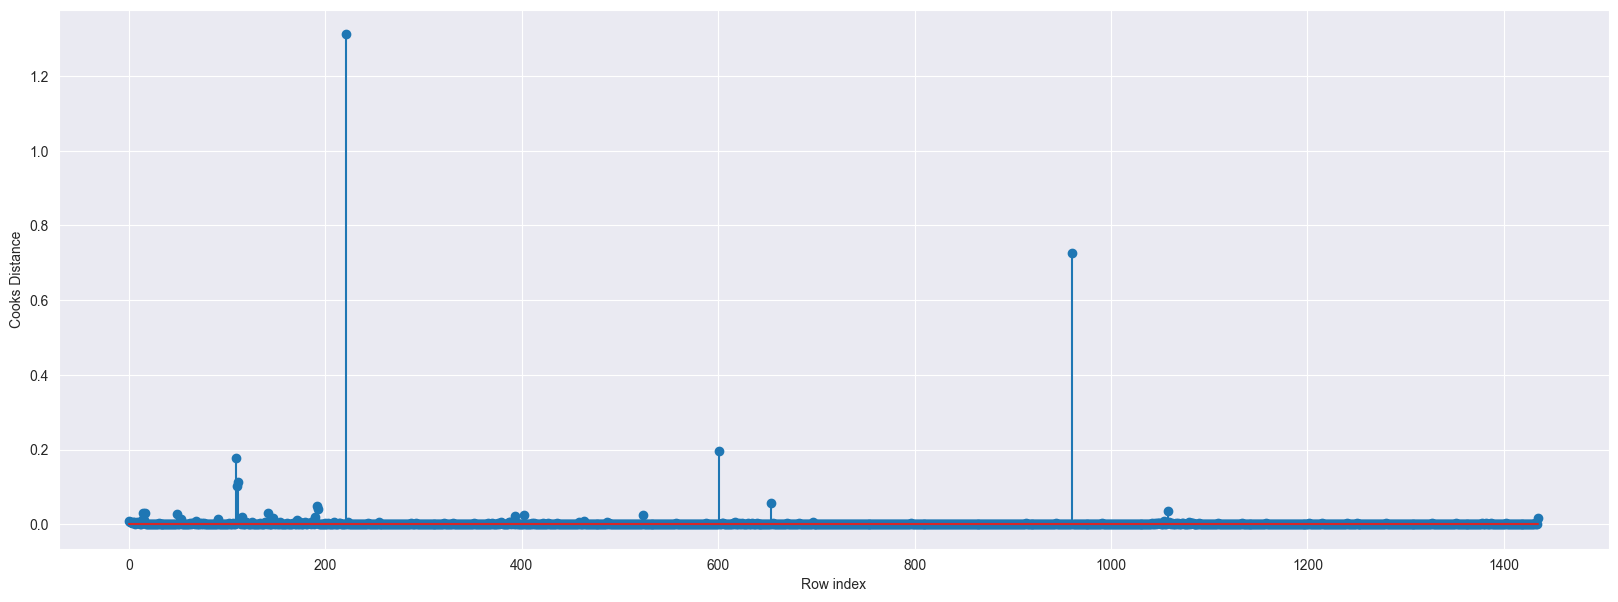

In [27]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(corolla)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [28]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(221, 1.3115552794480139)

### High Influence points

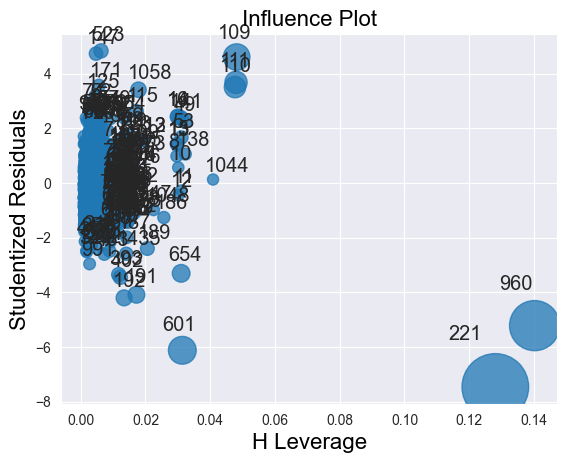

In [29]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model_new)
plt.show()

In [30]:
k = 5 
n = corolla.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff 

0.01253481894150418

In [31]:
corolla[corolla.index.isin([221, 960])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
221,12450,44,74172,110,1600,5,5,163,1615
960,9390,66,50806,86,1300,3,5,19,1480


## Improving the model

In [32]:
#Discard the data points which are influencers and reasign the row number (reset_index())
corolla1=corolla.drop(corolla.index[[221,960]],axis=0).reset_index()

In [33]:
#Drop the original index
corolla1=corolla1.drop(['index'],axis=1)

In [34]:
corolla1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


## Build Model

In [35]:
#Exclude variable "Quarterly_Tax" and generate R-Squared and AIC values
final_ml= smf.ols('Price~Age_08_04+KM+HP+Weight',data = corolla1).fit()

In [36]:
#Again check for influencers
model_influence_V = final_ml.get_influence()
(c_V, _) = model_influence_V.cooks_distance 

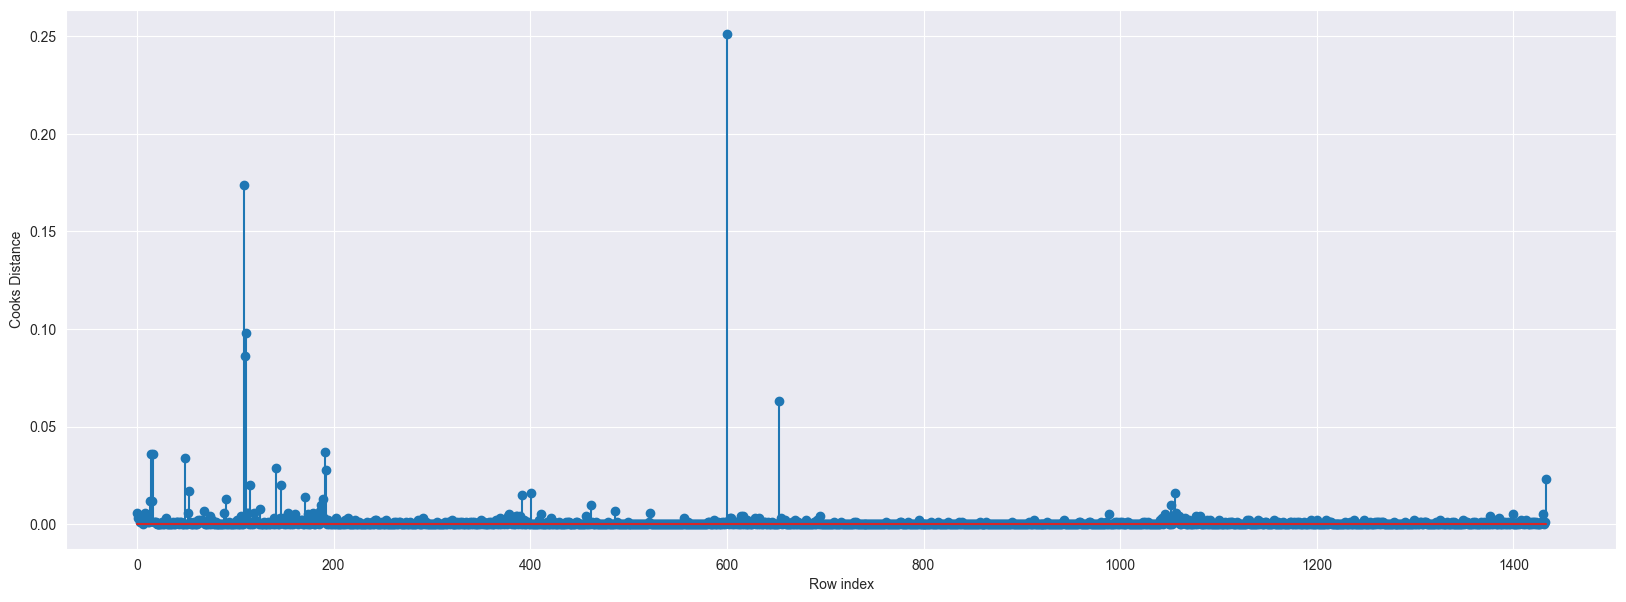

In [37]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(corolla1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance'); 

#### Since the value is <1 , we can stop the diagnostic process and finalize the model

In [38]:
final_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     2425.
Date:                Mon, 26 Jun 2023   Prob (F-statistic):               0.00
Time:                        14:35:30   Log-Likelihood:                -12317.
No. Observations:                1434   AIC:                         2.464e+04
Df Residuals:                    1429   BIC:                         2.467e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7912.0770    976.375     -8.104      0.000   -9827.360   -5996.794
Age_08_04   -116.2934      2.599    -44.754      0.000    -121.391    -111.196
KM            -0.0213      0.001    -18.097      0.000      -0.024      -0.019
HP            28.7916      2.455     11.730      0.000      23.977      33.607
Weight        22.0984      0.846     26.124      0.000      20.439      23.758
==============================================================================
Omnibus:                      122.446   Durbin-Watson:                   1.618
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              622.478
Skew:                          -0.201   Prob(JB):                    6.77e-136
Kurtosis:                       6.203   Cond. No.                     2.22e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.22e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

--------------
An improved r-squared value that before

## Predicting for new data

In [39]:
pred_y = final_ml.predict(corolla)

In [40]:
pred_y

0       16749.232919
1       16197.046132
2       16745.181249
3       16378.776752
4       16226.236434
            ...     
1431     8753.434066
1432     8216.423578
1433     8374.932644
1434     8493.353856
1435    11034.246883
Length: 1436, dtype: float64

In [41]:
from sklearn.metrics import mean_squared_error
print('The RMSE value is', np.sqrt(mean_squared_error(corolla['Price'], pred_y)))

The RMSE value is 1357.3275237328692


### Applying Ridge Regularization

In [43]:
# import ridge regression from sklearn library 
from sklearn.linear_model import Ridge

data1 = pd.read_csv('ToyotaCorolla.csv')
data1 = pd.get_dummies(data1)

x = data1.drop(['Price'], axis = 1)
y = data1['Price']
# Train the model 
ridgeR = Ridge(alpha = 1) 
ridgeR.fit(x, y) 
y_pred = ridgeR.predict(x) 

# calculate mean square error 
mean_squared_error_ridge = np.mean((y_pred - y)**2) 
print(np.sqrt(mean_squared_error_ridge))

# get ridge coefficient and print them 
ridge_coefficient = pd.DataFrame() 
ridge_coefficient["Columns"]= x.columns 
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_) 
print(ridge_coefficient) 

795.2726762341026
                                              Columns  Coefficient Estimate
0                                                  Id              1.050036
1                                           Age_08_04           -136.625942
2                                           Mfg_Month           -113.730603
3                                            Mfg_Year             20.863045
4                                                  KM             -0.013141
..                                                ...                   ...
404  Model_TOYOTA Corolla VERSO 2.0 D4D LINEA SOL MPV            253.901178
405    Model_TOYOTA Corolla VERSO 2.0 D4D SOL (7) MPV           2456.394881
406                                     Fuel_Type_CNG           -858.314328
407                                  Fuel_Type_Diesel             41.367215
408                                  Fuel_Type_Petrol            816.947113

[409 rows x 2 columns]


### Applying Lasso Regularization

In [44]:
from sklearn.linear_model import Lasso 

data1 = pd.read_csv('ToyotaCorolla.csv')
data1 = pd.get_dummies(data1)

x = data1.drop(['Price'], axis = 1)
y = data1['Price']

# Train the model 
lasso = Lasso(alpha = 1) 
lasso.fit(x, y) 
y_pred1 = lasso.predict(x) 

# Calculate Mean Squared Error 
mean_squared_error = np.mean((y_pred1 - y)**2) 
print("Root mean squared error on test set", np.sqrt(mean_squared_error))
lasso_coeff = pd.DataFrame() 
lasso_coeff["Columns"] = x.columns 
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_) 

print(lasso_coeff) 

Root mean squared error on test set 838.1937982833895
                                              Columns  Coefficient Estimate
0                                                  Id              0.868707
1                                           Age_08_04           -132.745499
2                                           Mfg_Month           -112.514460
3                                            Mfg_Year              0.000000
4                                                  KM             -0.013310
..                                                ...                   ...
404  Model_TOYOTA Corolla VERSO 2.0 D4D LINEA SOL MPV              0.000000
405    Model_TOYOTA Corolla VERSO 2.0 D4D SOL (7) MPV           2058.172464
406                                     Fuel_Type_CNG           -323.233369
407                                  Fuel_Type_Diesel             -0.000000
408                                  Fuel_Type_Petrol           1540.225059

[409 rows x 2 columns]


### Applying Elastic Net Regularization

In [45]:
# import model 
from sklearn.linear_model import ElasticNet 

data1 = pd.read_csv('ToyotaCorolla.csv')
data1 = pd.get_dummies(data1)

x = data1.drop(['Price'], axis = 1)
y = data1['Price']

# Train the model 
e_net = ElasticNet(alpha = .4,l1_ratio=.5) 
e_net.fit(x, y) 

# calculate the prediction and mean square error 
y_pred_elastic = e_net.predict(x) 
mean_squared_error = np.mean((y_pred_elastic - y)**2) 
print("Root mean Squared Error on test set", np.sqrt(mean_squared_error))

e_net_coeff = pd.DataFrame() 
e_net_coeff["Columns"] = x.columns 
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_) 
e_net_coeff 

Root mean Squared Error on test set 1157.4924994068401


,Columns,Coefficient Estimate
0,Id,2.196446
1,Age_08_04,-174.186913
2,Mfg_Month,-146.320184
3,Mfg_Year,25.875599
4,KM,-0.012584
...,...,...
404,Model_TOYOTA Corolla VERSO 2.0 D4D LINEA SOL MPV,2.683225
405,Model_TOYOTA Corolla VERSO 2.0 D4D SOL (7) MPV,27.942791
406,Fuel_Type_CNG,-71.382636
407,Fuel_Type_Diesel,-44.778079


------------

Ridge Regularization gave some improved results